In [419]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew 
from scipy.special import boxcox1p
#inv - inv_boxcox1p(y, 2.5)

In [420]:
df = pd.read_csv('../housing.data', sep='\s+', header=None, names=['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

    1. CRIM      per capita crime rate by town
    
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
                 
    3. INDUS     proportion of non-retail business acres per town
    
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
                 
    5. NOX       nitric oxides concentration (parts per 10 million)
    
    6. RM        average number of rooms per dwelling
    
    7. AGE       proportion of owner-occupied units built prior to 1940
    
    8. DIS       weighted distances to five Boston employment centres
    
    9. RAD       index of accessibility to radial highways
    
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
                 
    13. LSTAT    % lower status of the population
    
    14. MEDV     Median value of owner-occupied homes in $1000's


1. CRIM: 도시 별 1 인당 범죄율

2. ZN: 25,000 sq.ft. 이상의 주차 구역 용 주거용 토지의 비율.

3. INDUS: 마을 당 non-retail business(t.v stations, radio stations, internet and telephone businesses, advertising campaigns) 에이커(단위) 의 비율 

4. CHAS: 찰스 리버 더미 변수 (강이 경계에 있으면 1, 그렇지 않으면 0)

5. NOX: 산화 질소 농도 (1000 만 분당)

6. RM: 주거 당 평균 객실 수

7. AGE: 1940 년 이전에 건설 된 소유주가 차지하는 비례

8. DIS: 보스턴 고용 센터 5 곳까지의 가중치

9. RAD: 방사형 고속도로 접근성 지수

10. TAX: $ 10,000 당 완전 가치 재산세 세율

11. PTRATIO: 마을 별 학생 - 교사 비율

12. B: 도시 별 흑인 비율

13. LSTAT: 인구의 낮은 지위

14. MEDV: 1000 달러짜리 주택 소유 주택의 중간 값

In [408]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 1. Data Exploration
- ### target
- ### features
- ### including feature engineering

## 1.1. Target (house price)

In [394]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

There is no zero price in here. It looks nice.

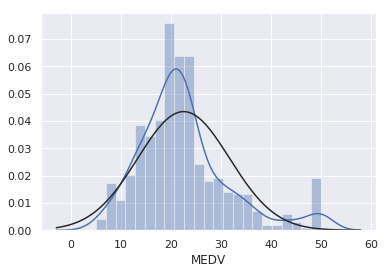

In [395]:
sns.distplot(df['MEDV'], fit=norm)

It has some issues with around $50,000 price houses.

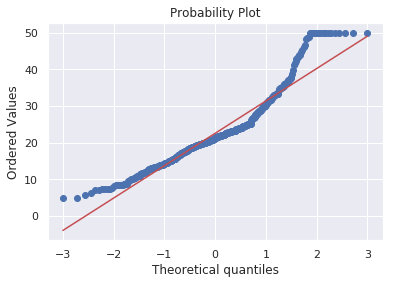

In [396]:
qq = stats.probplot(df['MEDV'], plot=plt)

In a QQ plot, It looks the target variable is skewed, so it needs transformation to make it more normally distributed.

In [26]:
# to reverse : np.expm1()
test1 = np.log1p(df['MEDV'])

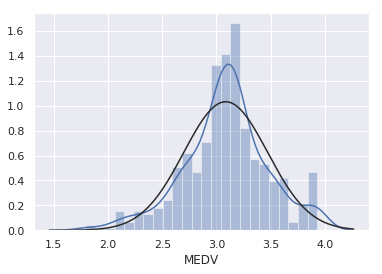

In [27]:
sns.distplot(test1 , fit=norm)

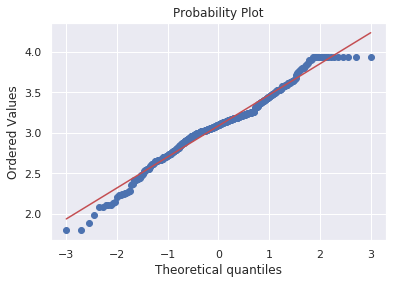

In [28]:
new_qq = stats.probplot(test1, plot=plt)

In [29]:
from scipy.special import boxcox1p
#inv - inv_boxcox1p(y, 2.5)


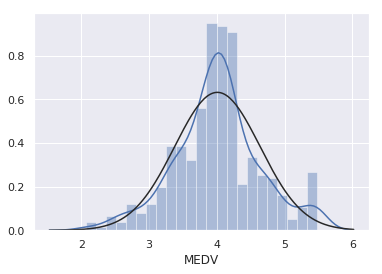

In [32]:
sns.distplot(test2 , fit=norm)

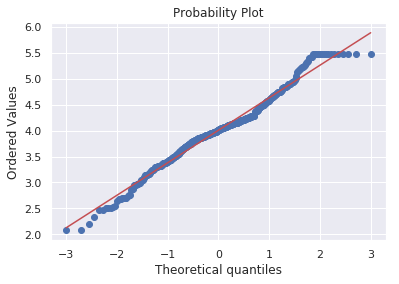

In [33]:
new_qq = stats.probplot(test2, plot=plt)

In [34]:
print(df['MEDV'].skew(), df['MEDV'].kurt())
print(test1.skew(), test1.kurt())
print(test2.skew(), test2.kurt())

1.1080984082549072 1.495196944165818
-0.2412435236076338 0.6740533238972457
-0.003720979032367325 0.5178231509635087


In [409]:
df['MEDV'] = np.log1p(df['MEDV'])

## 1.2. Features

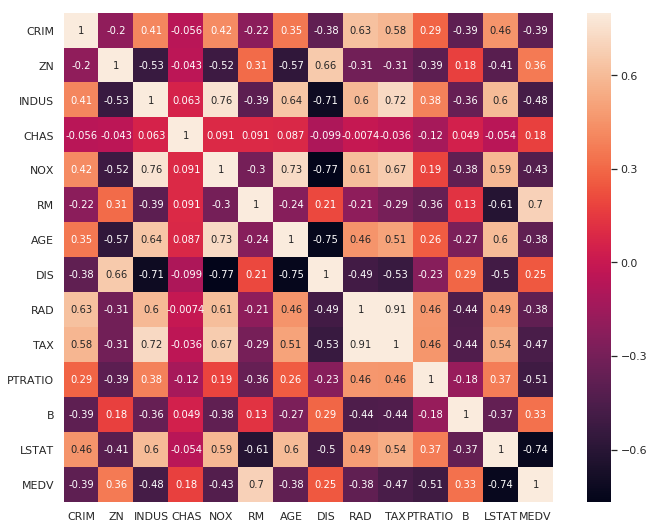

In [355]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

In [37]:
#sns.set()
#sns.pairplot(df, size=1.0)

In [38]:
#plt.show()

## Relationship with categorical features(CHAS)

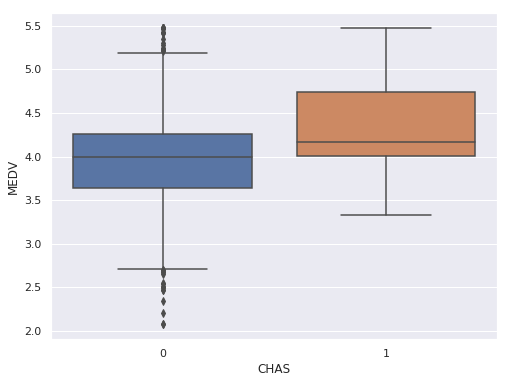

In [45]:
#box plot CHAS/MEDV
data = pd.concat([df['MEDV'], df['CHAS']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='CHAS', y='MEDV', data=data)

It seems that it is not that beautiful with our target MEDV, but I can live with that.

## Relationship with numerical features

- ### CRIM(per capita crime rate by town)

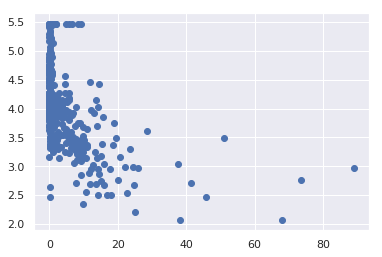

In [40]:
plt.scatter(df['CRIM'], df['MEDV'])

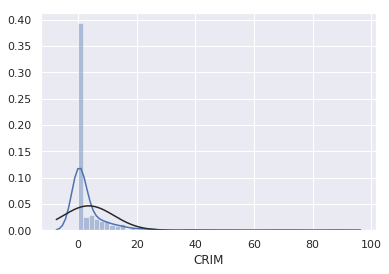

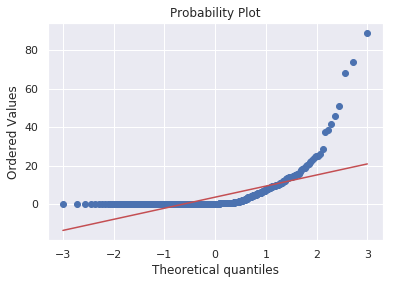

In [41]:
#histogram and normal probability plot
sns.distplot(df['CRIM'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['CRIM'], plot=plt)

In [55]:
test1 = np.log1p(df['CRIM'])

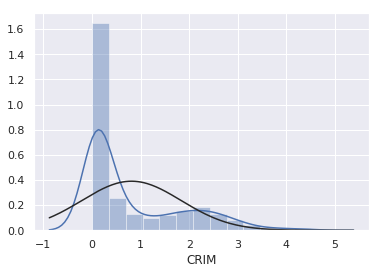

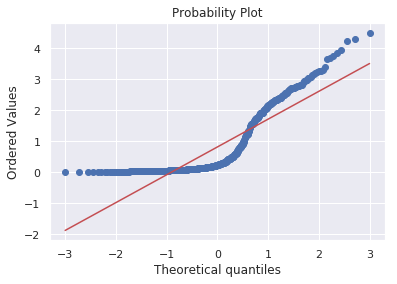

In [56]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

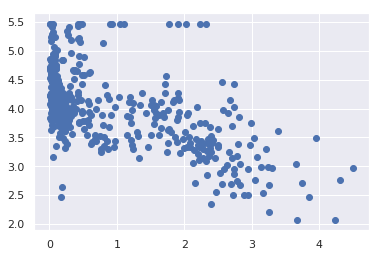

In [138]:
plt.scatter(test1, df['MEDV'])

In [198]:
print(df['CRIM'].skew(), df['CRIM'].kurt())
print(test1.skew(), test1.kurt())

5.223148798243851 37.13050912952203
1.2692005882725572 0.5045535413312598


In [200]:
df['CRIM'] = np.log1p(df['CRIM'])

- ### ZN (proportion of residential land zoned for lots over 25,000 sq.ft.)

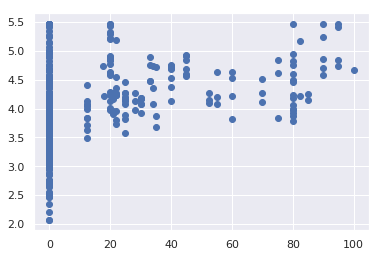

In [201]:
plt.scatter(df['ZN'], df['MEDV'])

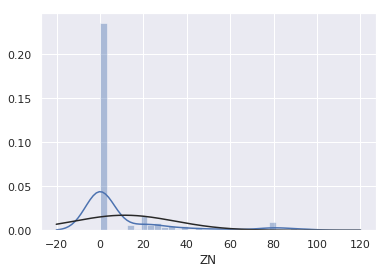

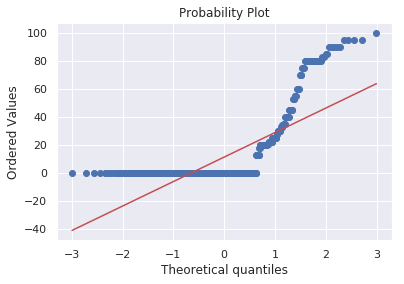

In [202]:
#histogram and normal probability plot
sns.distplot(df['ZN'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['ZN'], plot=plt)

In [203]:
df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [204]:
test1 = np.log1p(df['ZN'])

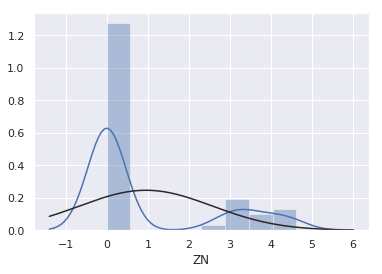

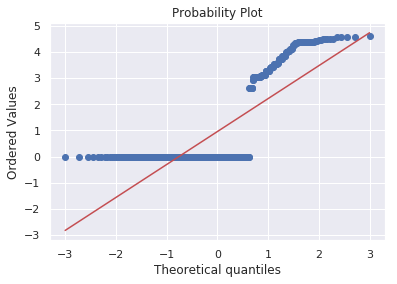

In [205]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

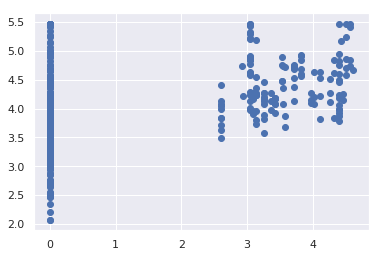

In [209]:
plt.scatter(test1, df['MEDV'])

In [252]:
df['ZN'] = np.log1p(df['ZN'])

- ### INDUS     proportion of non-retail business acres per town

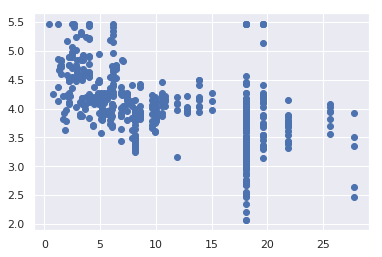

In [253]:
plt.scatter(df['INDUS'], df['MEDV'])

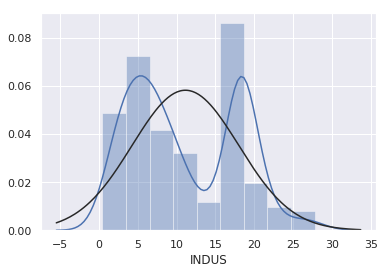

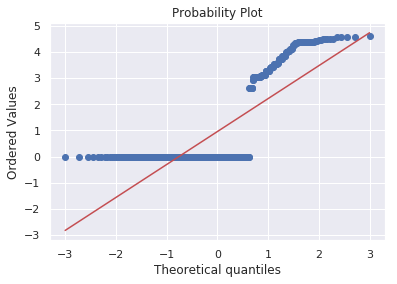

In [255]:
#histogram and normal probability plot
sns.distplot(df['INDUS'], fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

In [272]:
test1 = np.log1p(df['INDUS'])

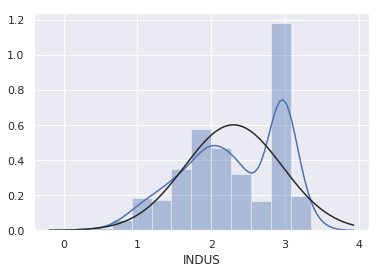

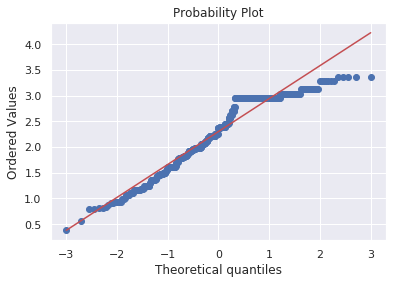

In [273]:
#histogram and normal probability plot
sns.distplot(test1, fit=norm);
fig = plt.figure()
res = stats.probplot(test1, plot=plt)

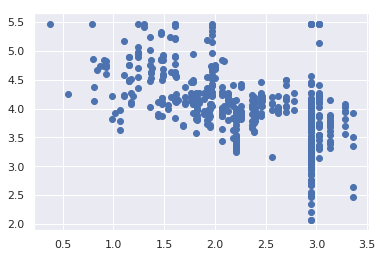

In [274]:
plt.scatter(test1, df['MEDV'])

In [275]:
df['INDUS'] = np.log1p(df['INDUS'])

### NOX

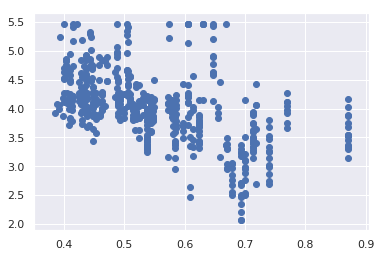

In [276]:
plt.scatter(df['NOX'], df['MEDV'])

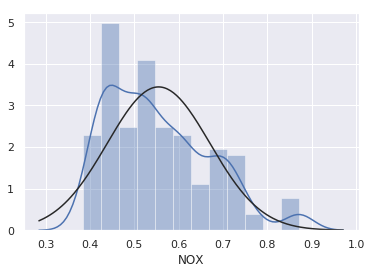

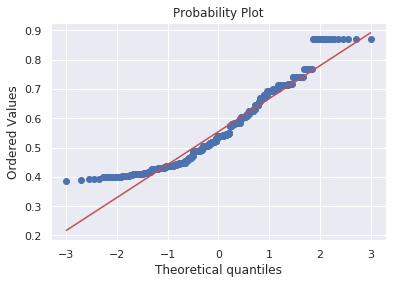

In [277]:
sns.distplot(df['NOX'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['NOX'], plot=plt)

In [421]:
df['MEDV'] = np.log1p(df['MEDV'])
for i in df.columns[:-1]:
    print(i)
    print(df[i].skew(), df[i].kurt())
    if i != 'CHAS' and (df[i].skew() > 0.75):
        df[i] = boxcox1p(df[i], 0.15)
        print(df[i].skew(), df[i].kurt())
    
    print('--------------------------')


CRIM
5.223148798243851 37.13050912952203
1.5087823936419944 1.6054359340291966
--------------------------
ZN
2.2256663227354307 4.031510083739155
1.2734919266490703 -0.08987364189668012
--------------------------
INDUS
0.29502156787351164 -1.2335396011495188
--------------------------
CHAS
3.405904172058746 9.638263777819526
--------------------------
NOX
0.7293079225348787 -0.06466713336542629
--------------------------
RM
0.40361213328874385 1.8915003664993404
--------------------------
AGE
-0.5989626398812962 -0.9677155941626912
--------------------------
DIS
1.0117805793009007 0.4879411222443908
0.4244094298892784 -0.7983866388790837
--------------------------
RAD
1.0048146482182057 -0.8672319936034931
0.6621327207579614 -0.9106709679989304
--------------------------
TAX
0.669955941795016 -1.1424079924768082
--------------------------
PTRATIO
-0.8023249268537809 -0.28509138330538875
--------------------------
B
-2.8903737121414492 7.226817549260753
--------------------------
LSTAT
